In [14]:
from src.agent.react import Agent
from src.inference.groq import ChatGroq
from src.inference.ollama import ChatOllama
from tools import terminal_tool,save_tool,weather_tool,search_tool
from os import environ
from dotenv import load_dotenv
from IPython.display import Markdown,display

load_dotenv()
api_key=environ.get('GROQ_API_KEY')

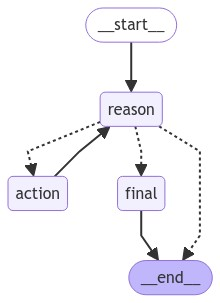

In [15]:
Agent().plot_mermaid()

In [20]:
llm=ChatGroq('llama-3.1-70b-versatile',api_key,temperature=0)
# llm=ChatOllama(model='llama3.1',temperature=0)
input="Top selling phones in India in 2021 save this data in an excel file"
agent=Agent('AI Assistant','You are a helpful AI Assistant',tools=[terminal_tool,weather_tool,search_tool,save_tool],llm=llm,verbose=True)
response=agent.invoke(input)

Thought: To find the top selling phones in India in 2021, I will first search for the information using the Search Tool. Then, I will use the Save Tool to save the data in an Excel file.
Action: {
  "Action Name": "Search Tool",
  "Action Input": {
    "query": "top selling phones in India 2021"
  }
}
Observation: Highest Sold Smartphones In India In 2021 - Gizbot News
Oppo F19. The Oppo F19 is another smartphone that comes under the best-sold devices of 2021 in India. It is a very lightweight device that offers an AMOLED panel, Snapdragon 662 processor, 48MP ...
Best Mobile Phones in India (August, 2024) | Latest & New Smartphones ...
Best Mobile Phones (09 August 2024) Best Mobile Phones in [August 2024], List of the Best Smartphones with price are Realme 13 Pro+ 5G, Motorola Razr 50 Ultra, Vivo X Fold 3 Pro, Realme 12 Pro+ 5G, Oppo Find X7 Ultra, Samsung Galaxy S24 Ultra, OnePlus 12, Vivo X100 Pro, Xiaomi 14 & OnePlus Open.
smartphone market share in india - Counterpoint
5G smartpho

AttributeError: 'NoneType' object has no attribute 'content'

In [18]:
display(Markdown(response))

The current price of iPhone 15 in India is Rs. 65,499.